/tmp/ipykernel_1418785/3646654345.py:22: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(bin_centres, (hist - hist_complete)/hist_complete)
/tmp/ipykernel_1418785/3646654345.py:22: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(bin_centres, (hist - hist_complete)/hist_complete)


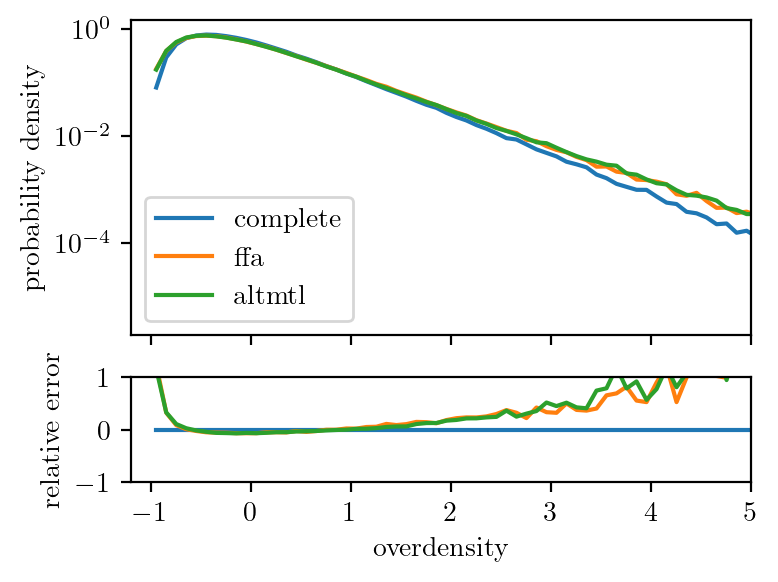

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax = plt.subplots(2, 1, figsize=(4, 3), sharex=True, height_ratios=[3, 1])

data_fn = f'/pscratch/sd/e/epaillas/dsc-desi/fibers/CIC_LRG_complete_NGC_z0.4-0.6_sm10.npy'
data_complete = np.load(data_fn)
hist_complete, bin_edges = np.histogram(data_complete, bins=100, density=True)
bin_centres = (bin_edges[1:] + bin_edges[:-1]) / 2

for fa in ['complete', 'ffa', 'altmtl']:
    data_fn = f'/pscratch/sd/e/epaillas/dsc-desi/fibers/CIC_LRG_{fa}_NGC_z0.4-0.6_sm10.npy'
    data = np.load(data_fn)
    
    hist, bin_edges = np.histogram(data, bin_edges, density=True)
    
    ax[0].plot(bin_centres, hist, label=fa)
    ax[1].plot(bin_centres, (hist - hist_complete)/hist_complete)

ax[0].set_xlim(-1.2, 5)
ax[1].set_ylim(-1, 1)
# ax[0].set_xscale('log')
ax[0].legend()
ax[1].set_ylabel(r'$\textrm{relative error}$')
ax[0].set_yscale('log')
ax[0].set_ylabel('probability density')
ax[1].set_xlabel('overdensity')
plt.show()